# PROJECT :: QUANTUM MACHINE LEARNING ON A REAL DATASET

In [3]:
# import some dependencies
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For machine learning
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# For Deep Learning
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
# Quantum Machine Learning
import qiskit
import qiskit_machine_learning
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.utils import algorithm_globals as alg
from qiskit.circuit.library import RealAmplitudes,ZZFeatureMap
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier,VQC
from qiskit.algorithms.optimizers import COBYLA,L_BFGS_B
from qiskit.primitives import Sampler


In [4]:
# Read in the data
df = pd.read_csv("C:\Datasets\Iris\iris.csv")

In [5]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Checking if there are null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
# Getting a feel of the number of values in each column
for column in df.columns:
    print(df[column].value_counts().head())

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
Name: sepal length (cm), dtype: int64
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
Name: sepal width (cm), dtype: int64
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
Name: petal length (cm), dtype: int64
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
Name: petal width (cm), dtype: int64
0.0    50
1.0    50
2.0    50
Name: target, dtype: int64


In [8]:
df.shape # Its a small dataset

(150, 5)

# DATA EXPLORATION 
In this section I will visualize some of the features, This will help me get to know more about my data

In [9]:
# Visualize visualize visualize
def plot_histogram(column,df=df):
    plt.figure(figsize=(20,8))
    sns.histplot(x=column,data=df)
    plt.title(f"The Distribution of {column} shown by A Histogram")
    plt.xlabel(f"{column} column")
    plt.ylabel("Total")
    plt.show()
def plot_kde(column,df=df):
    plt.figure(figsize=(20,8))
    sns.kdeplot(x=column,data=df)
    plt.title(f"The Distribution of {column} shown by Kernel Density Estimation")
    plt.xlabel(f"{column} column")
    plt.ylabel("Total")
    plt.show()

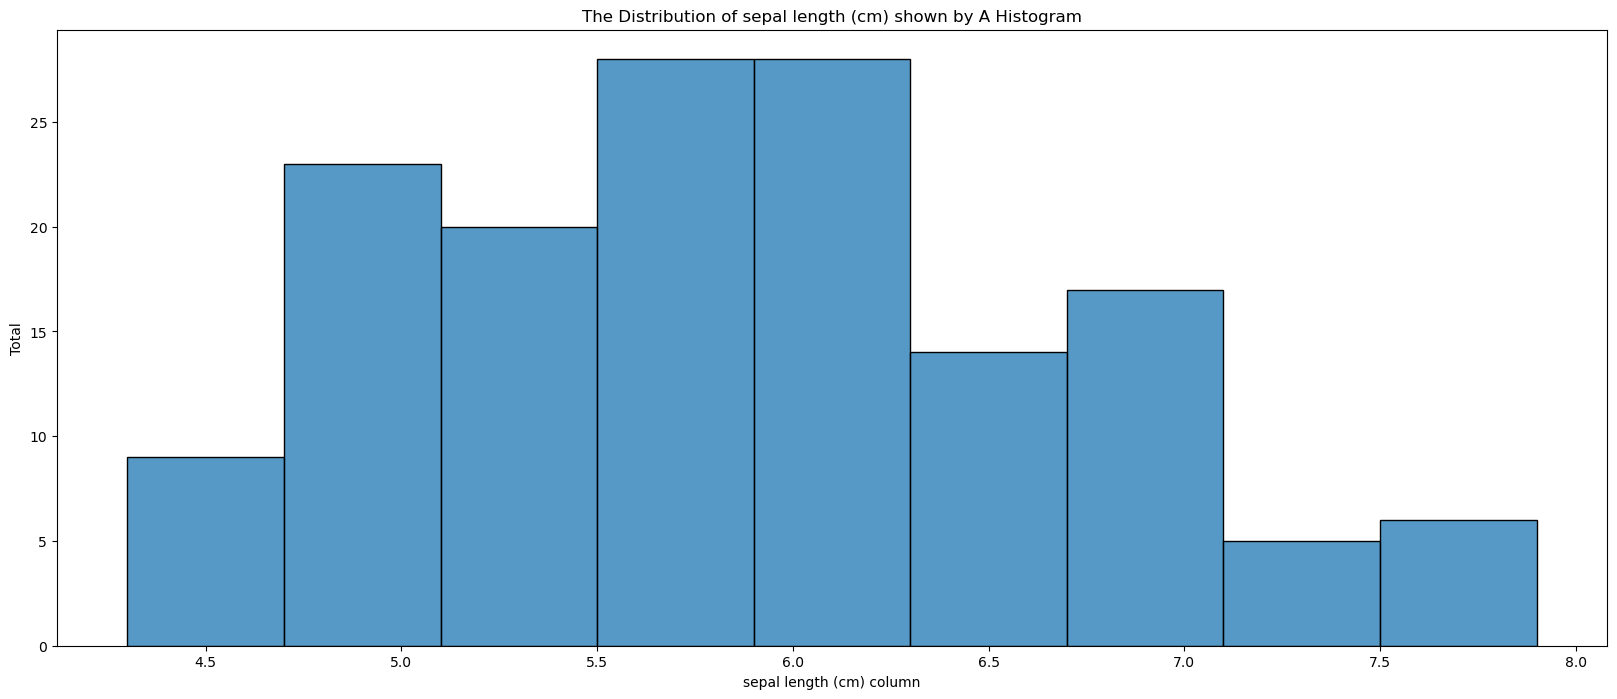

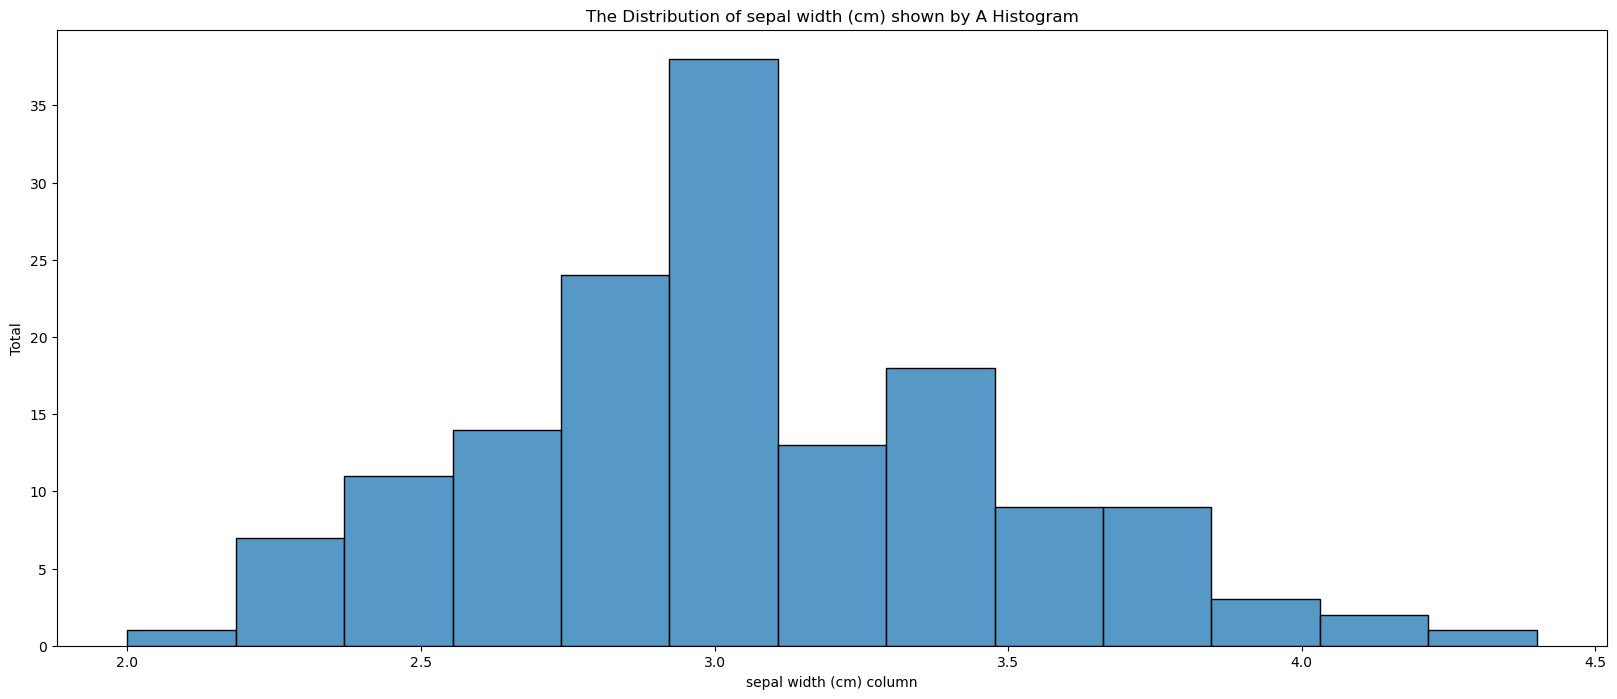

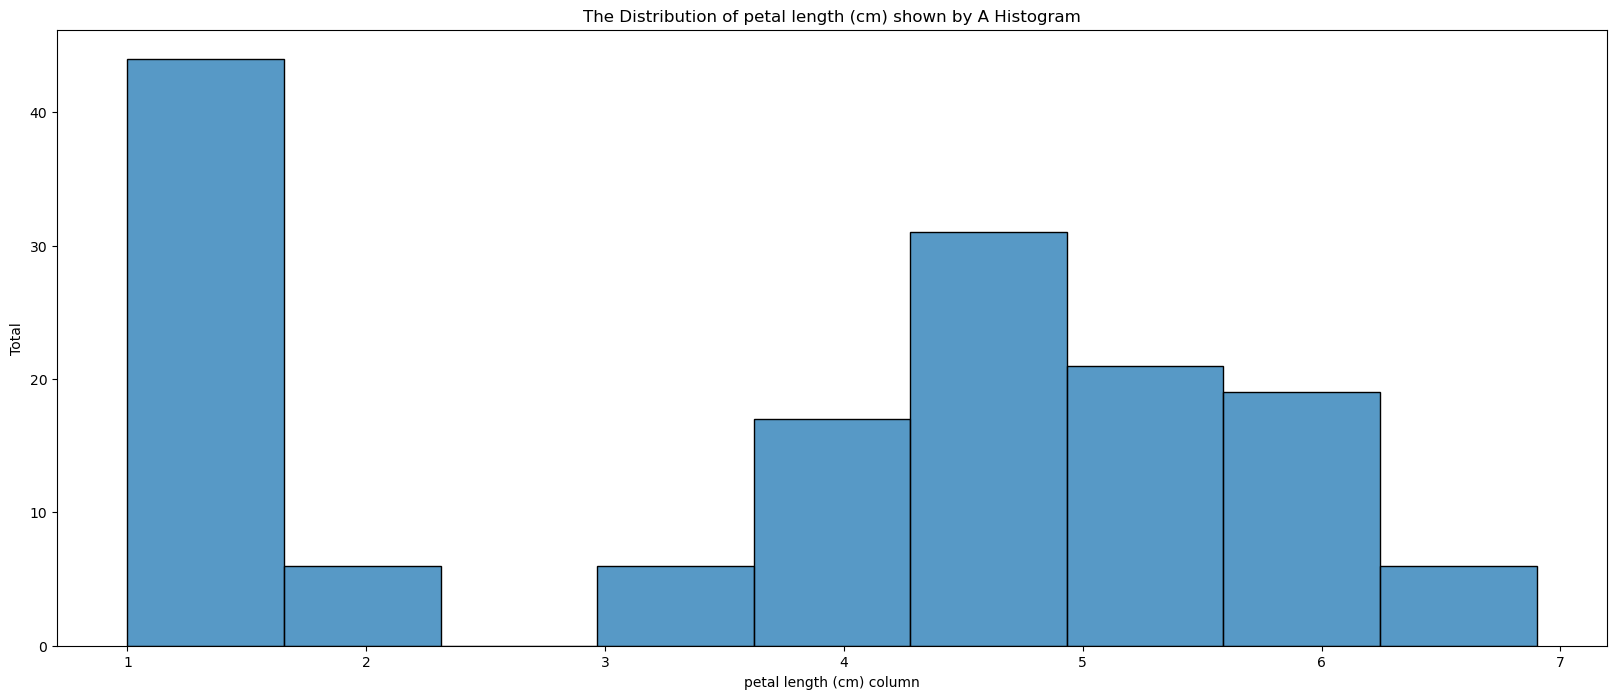

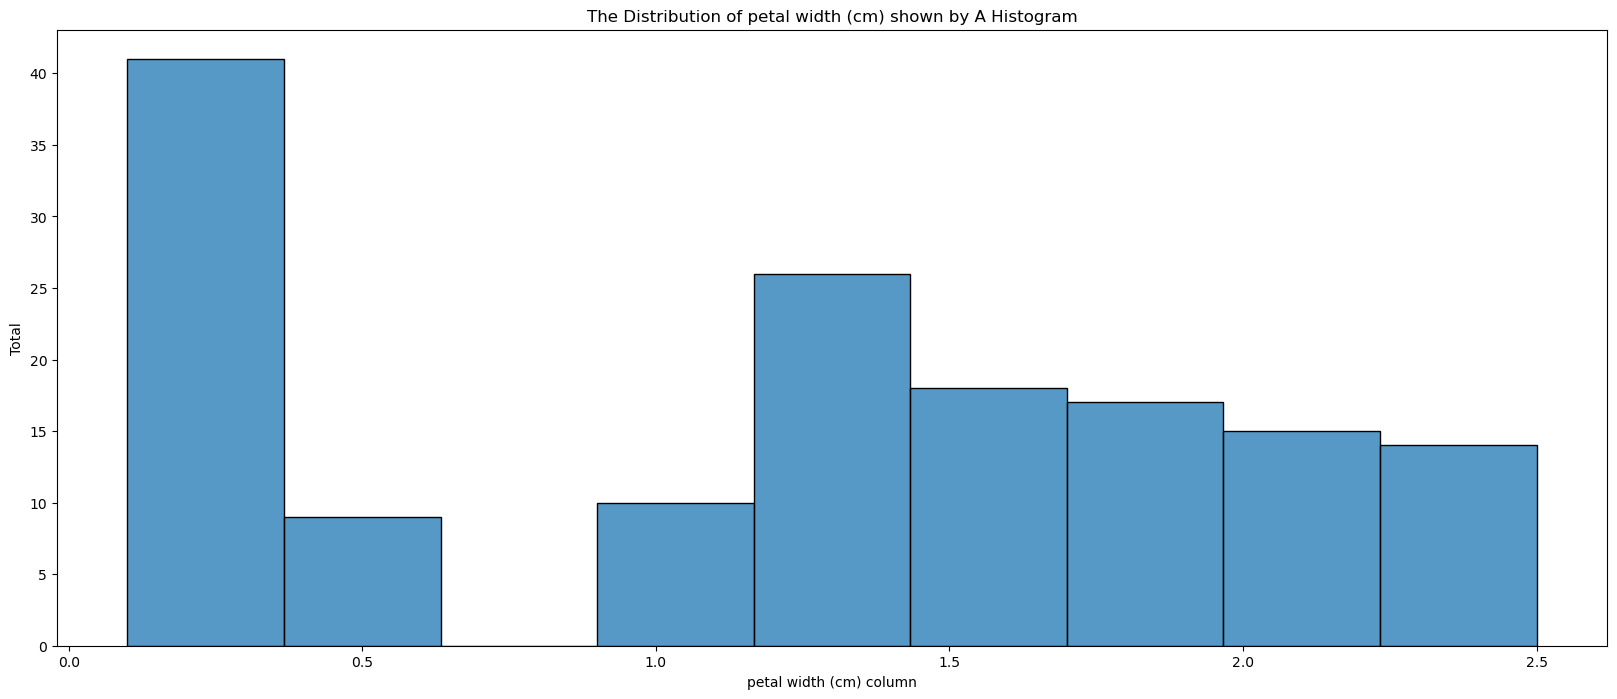

In [10]:
for column in df.columns : # This Returns Histograms for all our features except the target which is discrete 
    if column in ['target']:
        pass
    else :
        plot_histogram(column)

# KDE PLOTS

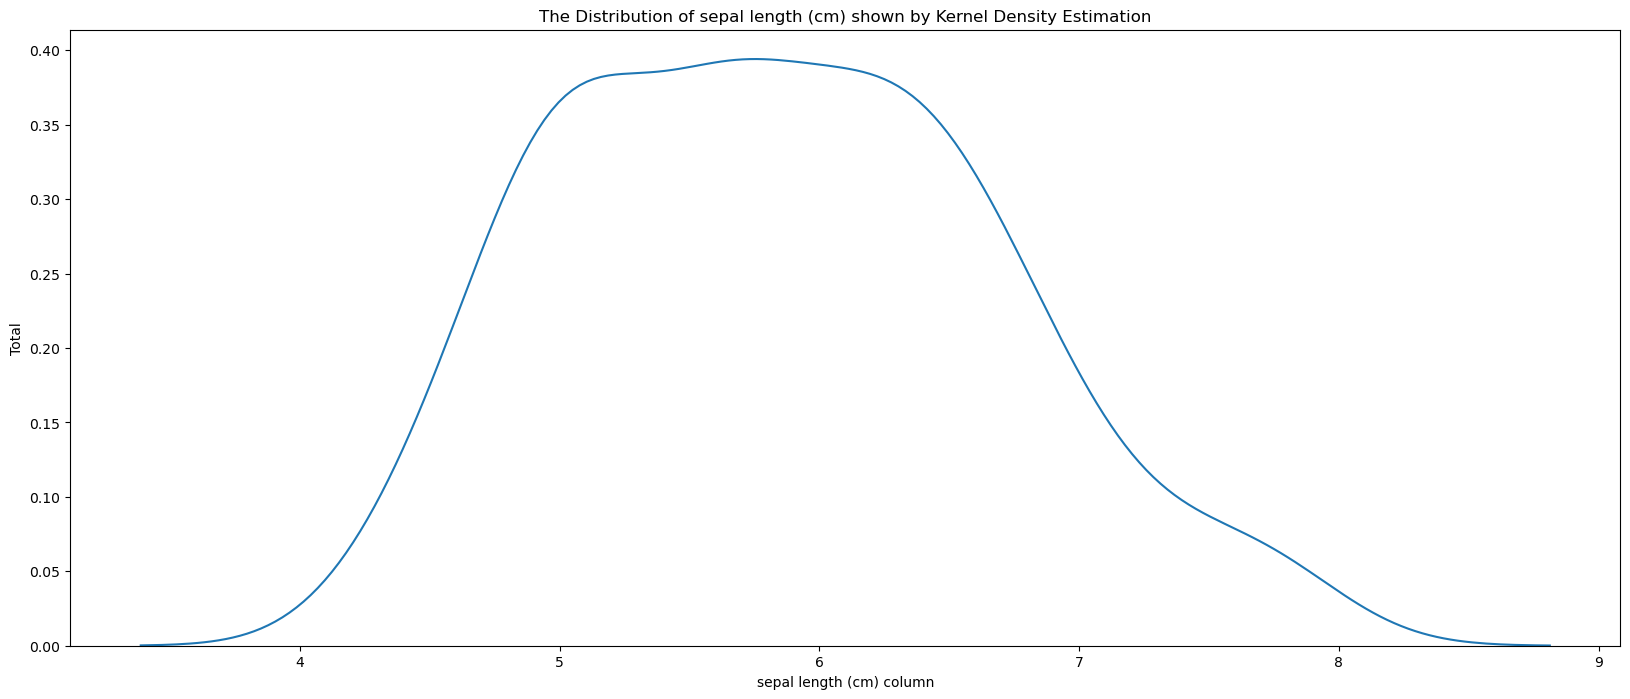

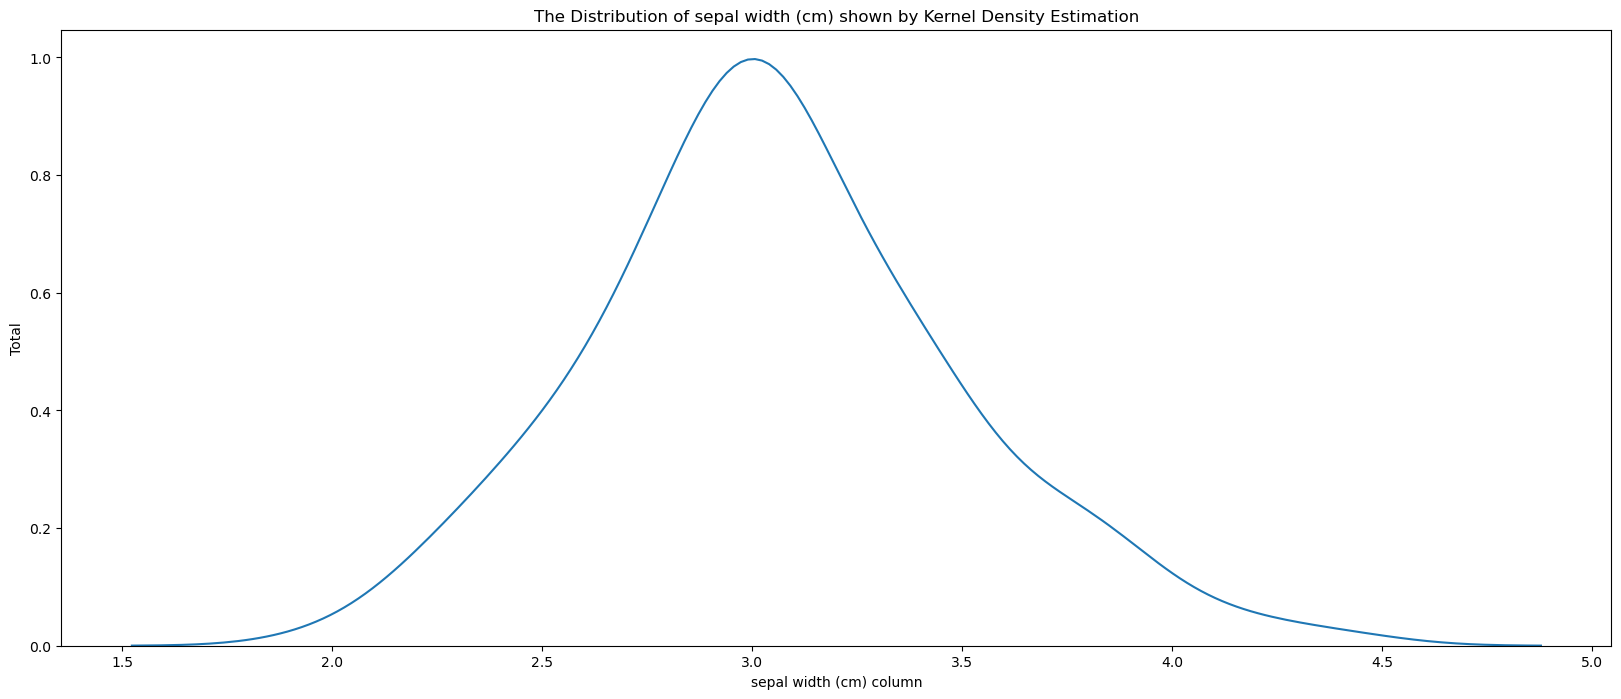

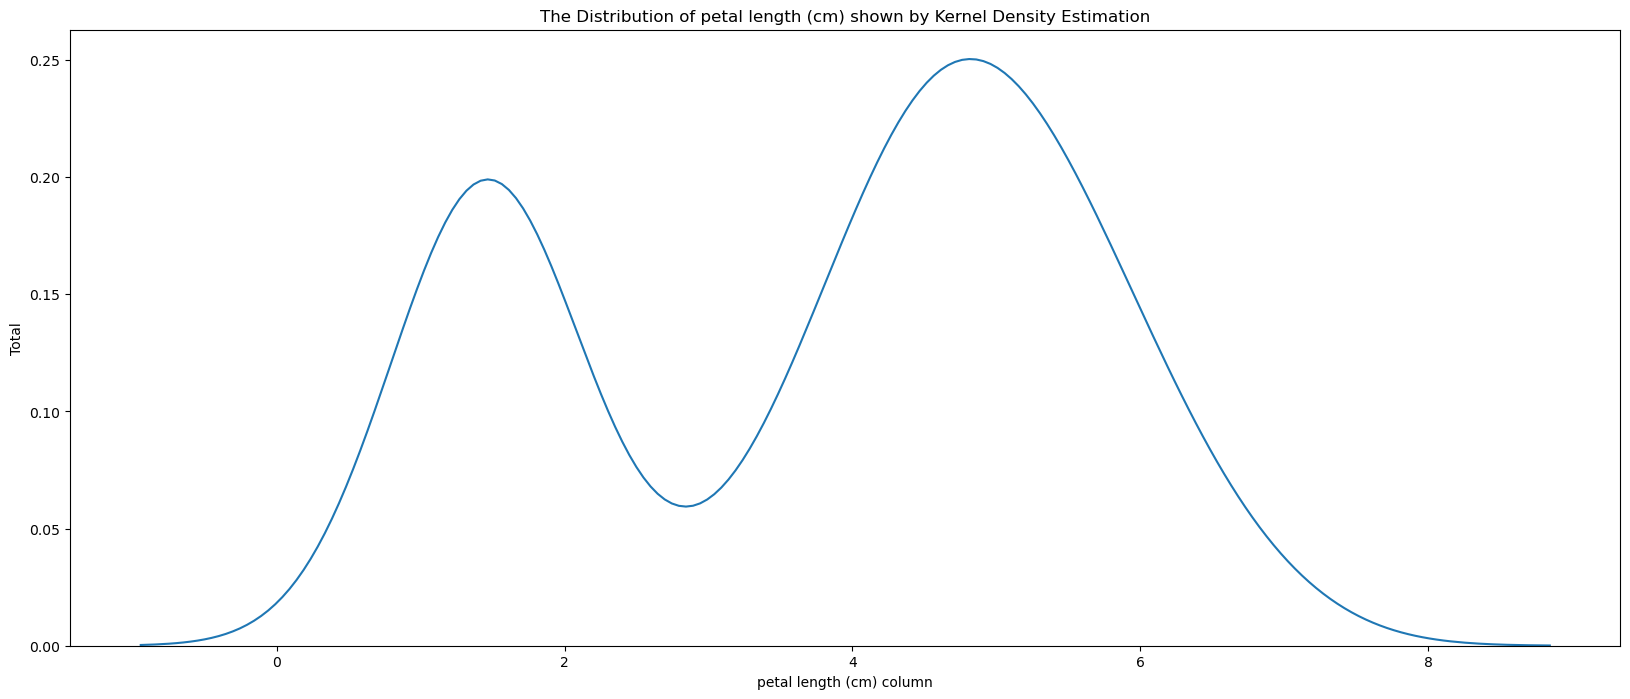

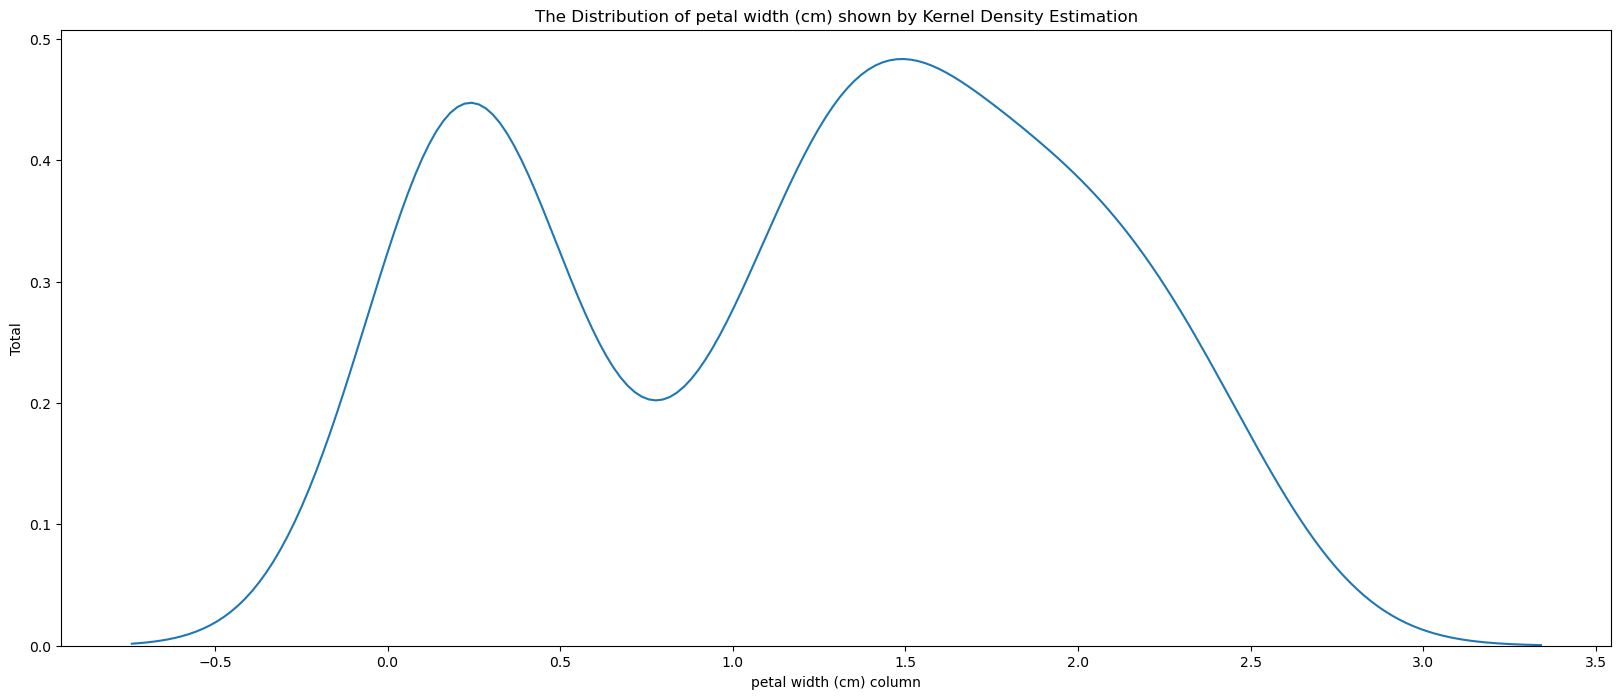

In [11]:
for column in df.columns : # This Returns Histograms for all our features except the target which is discrete 
    if column in ['target']:
        pass
    else :
        plot_kde(column)

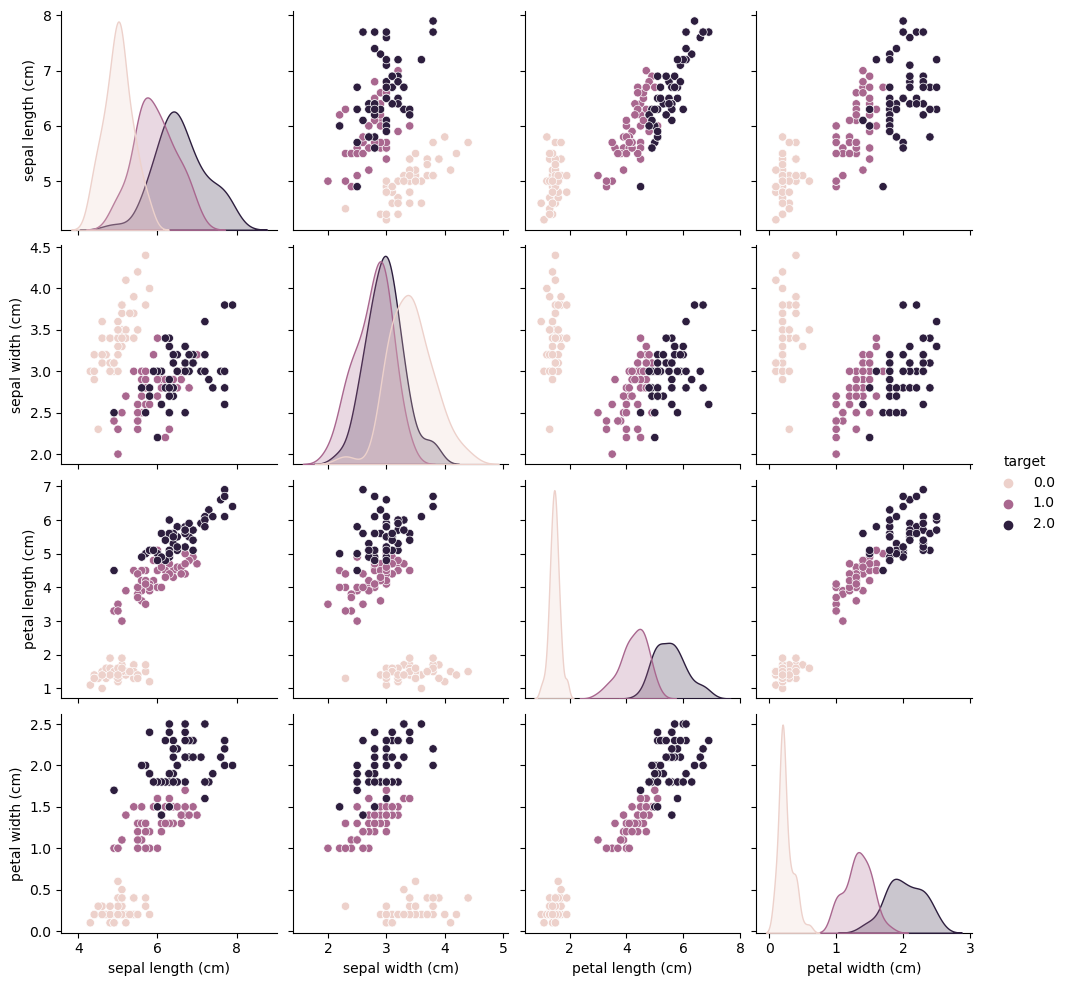

In [12]:
# A pairplot with a target hue
sns.pairplot(df,hue='target')
plt.show()

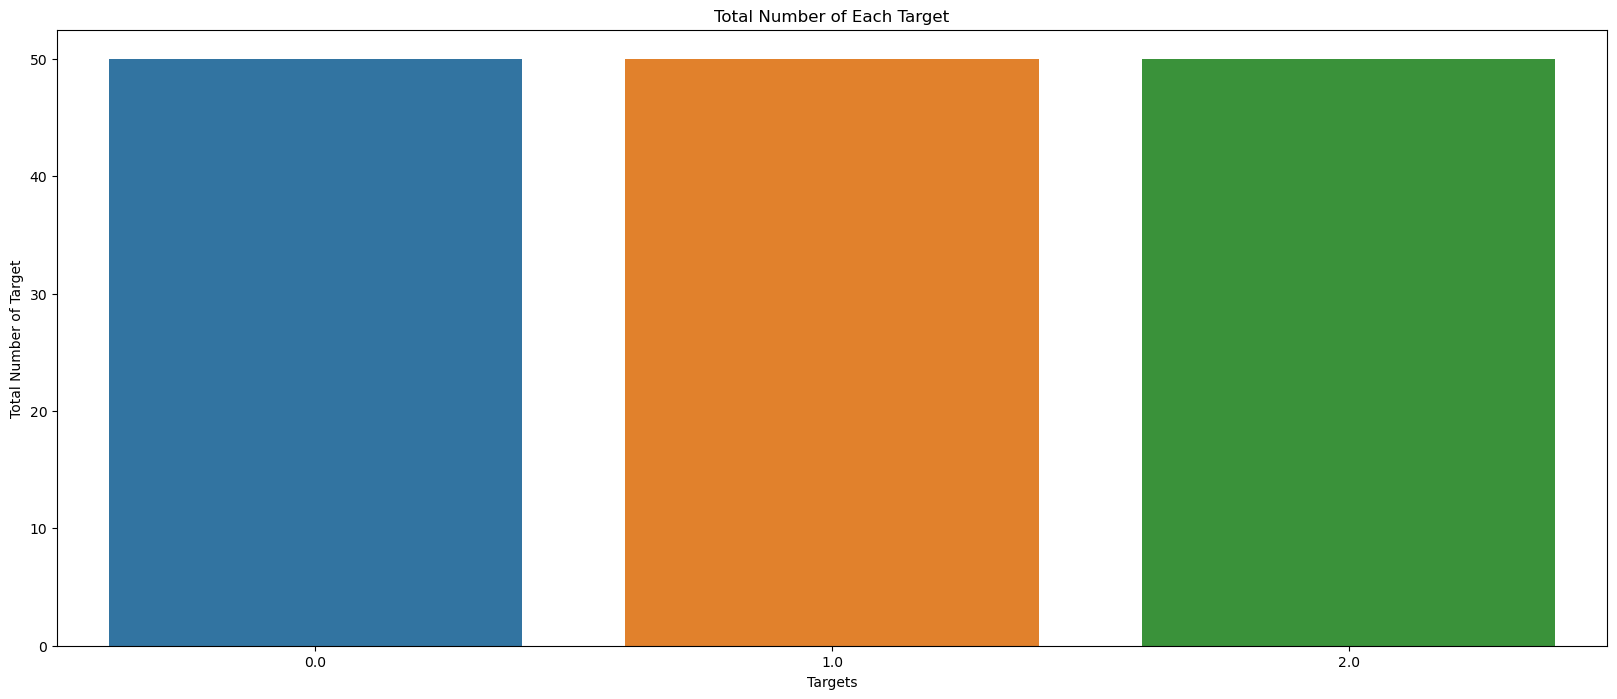

In [13]:
# Lets see our targets 
fig = plt.figure(figsize=(20,8))
sns.countplot(x='target',data=df)
plt.xlabel("Targets")
plt.ylabel("Total Number of Target")
plt.title("Total Number of Each Target")
plt.show() # Clearly they are all evenly distributed

In [14]:
# How about correlation
correlation = df.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [15]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

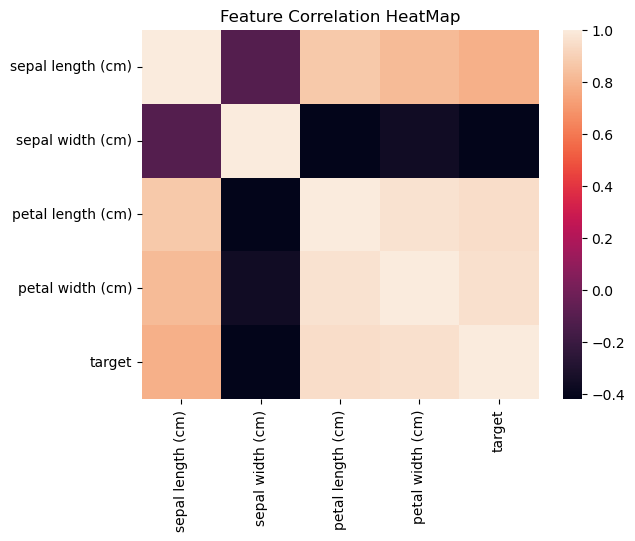

In [16]:
# Draw a Heatmap for our correlation
sns.heatmap(correlation)
plt.title("Feature Correlation HeatMap")
plt.show()

# DATA PREPROCESSING FOR MACHINE LEARNING 
We need to scale our data before we feed it to our Machine Learning Model .We do this by scaling all the features 
except our target feature.This increases the Accuracy in our model and the model learns the data better

In [17]:
X = df.drop(['target','sepal width (cm)'],axis=1)
y = df['target']

In [18]:
# Scale
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)

In [19]:
assert X.shape == X_scaled.shape

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# CLASSICAL MACHINE LEARNING 

In [21]:
lsv = LinearSVC()
lsv.fit(X_train,y_train)
l_training_score = lsv.score(X_train,y_train)
l_testing_score = lsv.score(X_test,y_test)
print(f"The Training Score for our SVC model is{l_training_score} and the testing score stands at \n Testing Score :{l_testing_score}")

The Training Score for our SVC model is0.925 and the testing score stands at 
 Testing Score :0.9666666666666667


In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
r_training_score = rfc.score(X_train,y_train)
r_testing_score = rfc.score(X_test,y_test)
print(f"The Training Score for our SVC model is{r_training_score} and the testing score stands at \n Testing Score :{r_testing_score}")

The Training Score for our SVC model is1.0 and the testing score stands at 
 Testing Score :1.0


In [23]:
svc = SVC()
svc.fit(X_train,y_train)
training_score = svc.score(X_train,y_train)
testing_score = svc.score(X_test,y_test)
print(f"The Training Score for our SVC model is{training_score} and the testing score stands at \n Testing Score :{testing_score}")

The Training Score for our SVC model is0.9583333333333334 and the testing score stands at 
 Testing Score :1.0


In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
d_training_score = dtc.score(X_train,y_train)
d_testing_score = dtc.score(X_test,y_test)
print(f"The Training Score for our SVC model is{d_training_score} and the testing score stands at \n Testing Score :{d_testing_score}")

The Training Score for our SVC model is1.0 and the testing score stands at 
 Testing Score :1.0


# NOTE
:: THE MODEL HAS HIGH VARIANCE ,THIS IS RELATIVELY SMALL DATASET AND SO ENSEMBLE MODELS TEND T0 OVERFIT THE DATA 
SINCE THIS IS ONLY A DEMO ON QUANTUM ML I WILL NOT FOCUS ON THIS ISSUE FOR NOW 

# CLASSICAL DEEP LEARNING 
Deep Learning can help us in getting relationships between variables.This is done by gradient optimization using Loss.
For Deep Learning I have mastery in Pytorch Framework and this is how the workflow goes

In [25]:
X_convert = X.values
y_convert = y.values.reshape(-1,1) # I am doing this so that our y values are 2 dimensional arrays 
X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor =train_test_split(X_convert,y_convert,test_size=0.2,random_state=42)

In [26]:
# Create tensors,so that we can feed them to our Deep Learning Model
X_train_tensor = torch.from_numpy(X_train_tensor).type(torch.Tensor)
X_test_tensor = torch.from_numpy(X_test_tensor).type(torch.Tensor)
y_train_tensor = torch.from_numpy(y_train_tensor).type(torch.Tensor)
y_test_tensor = torch.from_numpy(y_test_tensor).type(torch.Tensor)

In [27]:
# Now that we have our tensors lets create a model 
class Irish_Classifier(nn.Module):
    def __init__(self,input_dim=3,hidden_dim=30,output_dim=1,p=0.2):
        super().__init__()
        self.input_dim= input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.dropout = nn.Dropout(p)
    def forward(self,x):
        #x = F.relu(x)
        x = self.dropout(self.linear2(self.linear1(x)))
        x = self.fc(x)
        return x


In [ ]:
model = Irish_Classifier()

In [ ]:
# Training the model
optimizer = optim.SGD(model.parameters(),lr=0.001)
criterion = nn.BCEWithLogitsLoss()


In [ ]:
epochs =100
for epoch in range(epochs):
    model.train()
    y_pred = model.forward(X_train_tensor)
    loss = criterion(y_pred,y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred = model.forward(X_test_tensor)
        test_loss = criterion(y_pred,y_test_tensor)
        if epoch % 10 == 0 :
            print(f"Epoch {epoch} |Training Loss{loss} |Testing Loss{test_loss}")
        

In [ ]:
predictions = model.forward(X_train_tensor)

# QUANTUM MACHINE LEARNING

In [ ]:
# Instantiate A Quantum Circuit
qc = QuantumCircuit(3)
feature_map = ZZFeatureMap(feature_dimension=3,reps=1)
ansatz = RealAmplitudes(3,reps=3)
qc.compose(feature_map)
qc.compose(ansatz)
feature_map.decompose().draw("mpl")

In [ ]:
#How about Ansatz
ansatz.decompose().draw("mpl")# The model has 11 parametres

In [ ]:
# choosing an optimizer and a sampler
optimizer_qml = COBYLA(maxiter=30)
sampler = Sampler()

In [ ]:
# Creating a CallBack graph
from IPython.display import clear_output
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12,6)
def callback_graph(weights,obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Plotting Objective Function Value against Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("ObjectiveFunctionValue")
    plt.plot(range(len(objective_func_vals)),objective_function_vals)
    plt.show()

# VARIATIONAL QUANTUM CLASSIFIER 

In [ ]:
vqc = VQC(sampler=sampler,optimizer=optimizer_qml,feature_map=feature_map,ansatz =ansatz)

In [ ]:
vqc.fit(X_train,y_train.values)

In [ ]:
print(f"The Training Score for Our VQC  is {vqc.score(X_train,y_train.values)}")
print("***"*20)
print(f"The Testing Score for Our VQC stands at {vqc.score(X_test,y_test.values)}")

In [ ]:
vqc.predict(X_test)

# PLOTTING OUT THE RESULTS ::

In [ ]:
y_predict = vqc.predict(X_test)
for x,y_target,y_p in zip(X_train,y_train.values,y_predict):
    if y_target == y_train[0]:
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
    if not np.all(y_target==y_p):
        plt.scatter(x[0],x[1],s=200,facecolors=None,edgecolors="r")
plt.plot([1,-1],[-1,1],"--",color="black")
plt.title("VARIATIONAL QUANTUM CLASSIFIER PREDICTIONS VS REAL VALUES")
plt.show()

# COMPARING LINEAR SVC AND VQC


In [ ]:
print(f"The Training Score for our LSVC model is{l_training_score} and the testing score stands at\nTesting Score for LSVC model is :{l_testing_score}")
print("***"*20)
print(f"The Training Score for Our VQC  is {vqc.score(X_train,y_train.values)}")
print(f"The Testing Score for Our VQC stands at {vqc.score(X_test,y_test.values)}")

# PROJECT CONCLUSION
 
In Conclusion Classical Machine Learning Perfoms better than Quantum Machine Learning as shown by the Results of the training
and testing data scores. Although Other Classical ML models like Random Forest Classifiers had an overfitting problem.This
can be fixed by using more data points.The Iris Dataset is reltively small ,on the upside this was a great project on QML.
I will love your upvotes and any suggestions and questions I will humbly tackle them.Thank You